# Table of contents 

Importing libraries  
Importing data
### Exploring relationships
Correlations - Heatmaps  
Scatterplots  
Pair Plot  
Categorical Plot  
Answers  
New Questions  
Hypotheses

## Importing libraries

In [76]:
# Import visualization libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
import os

## 01. Importing data

In [77]:
# Create folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/6. Advanced Analytics & Dashboard Design/World_Happiness_Report'

In [78]:
# Import dataframe

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', '2015-2023.csv'), index_col = False)

## 02. Exploring Relationships

In [79]:
# Check the column names 

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'country', 'region', 'happiness_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category',
       'annual_average', 'avg_annual_region', 'avg_annual'],
      dtype='object')

In [80]:
sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions']]

sub.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


### Correlation

In [81]:
# Create a correlation matrix using pandas

sub.corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions
happiness_score,1.000000,0.724250,0.648813,0.681654,0.569184,0.080763,0.416708
gdp_per_capita,0.724250,1.000000,0.522057,0.565485,0.440336,-0.153808,0.340792
social_support,0.648813,0.522057,1.000000,0.560775,0.365126,-0.006695,0.148499
healthy_life_expectancy,0.681654,0.565485,0.560775,1.000000,0.260014,0.024061,0.257475
freedom_to_make_life_choices,0.569184,0.440336,0.365126,0.260014,1.000000,0.155814,0.432140
generosity,0.080763,-0.153808,-0.006695,0.024061,0.155814,1.000000,0.224466
corruption_perceptions,0.416708,0.340792,0.148499,0.257475,0.432140,0.224466,1.000000


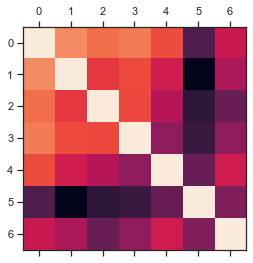

In [82]:
# Create a correlation matrix heatmap

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

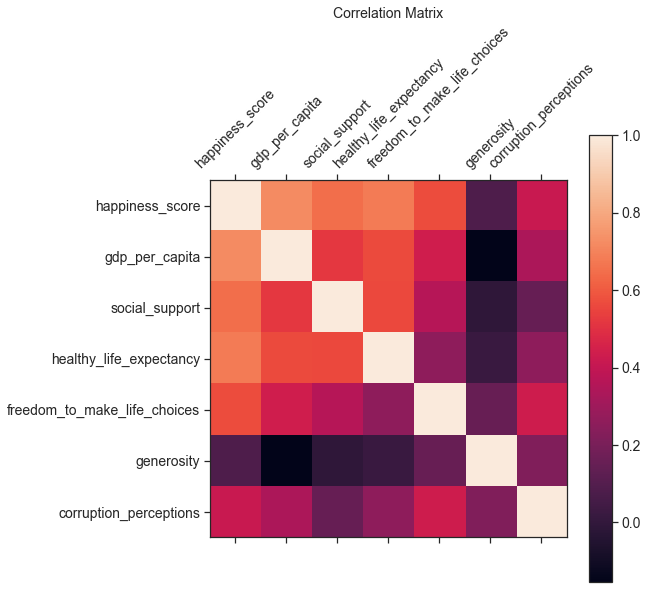

In [83]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [84]:
# Export chart outside of Jupyter in the form of an image file

plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'plt.png'))

<Figure size 432x288 with 0 Axes>

In [85]:
# Save figure

plt.savefig("out.png")

<Figure size 432x288 with 0 Axes>

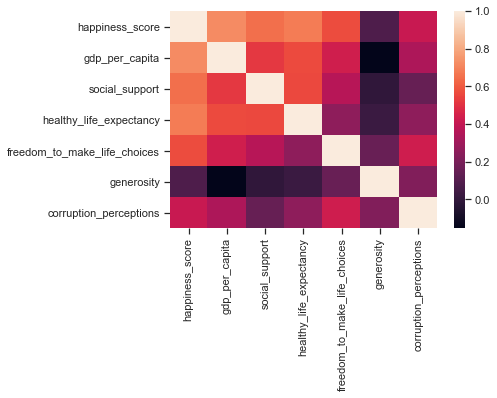

In [86]:
# Create an easy heatmap using seaborn 

v = sns.heatmap(sub.corr());

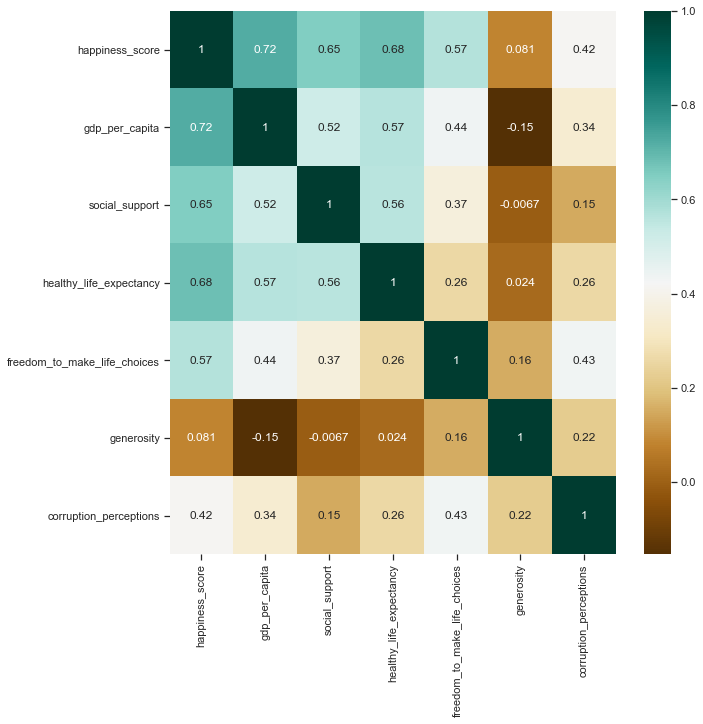

In [87]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

sec_hm = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap='BrBG')

In [88]:
# Export heatmap outside of Jupyter in the form of an image file

fig = sec_hm.get_figure()

fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'sec_hm.png'))

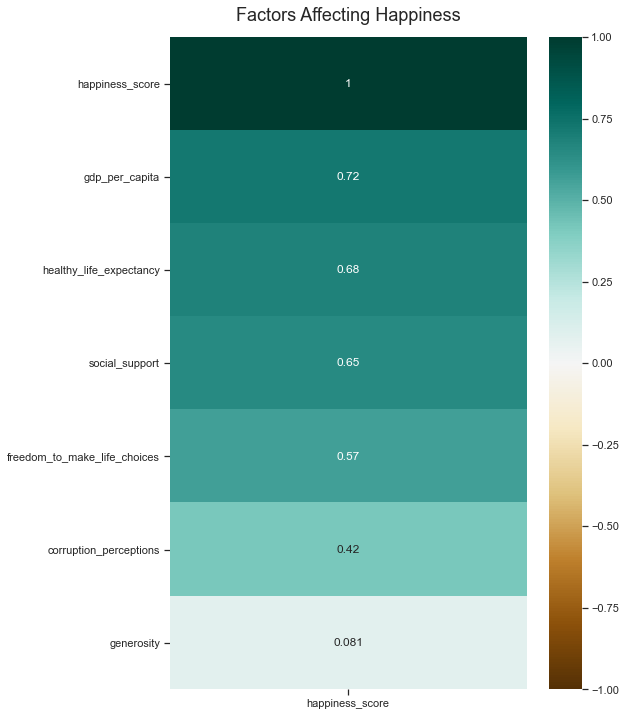

In [89]:
# Create sorted heatmap

plt.figure(figsize=(8, 12))
sorted_hm = sns.heatmap(sub.corr()[['happiness_score']].sort_values(by = 'happiness_score', ascending = False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sorted_hm.set_title('Factors Affecting Happiness', fontdict={'fontsize':18}, pad=16);

In [90]:
# Export heatmap outside of Jupyter in the form of an image file

fig2 = sorted_hm.get_figure()

fig2.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'sorted_hm.png'))

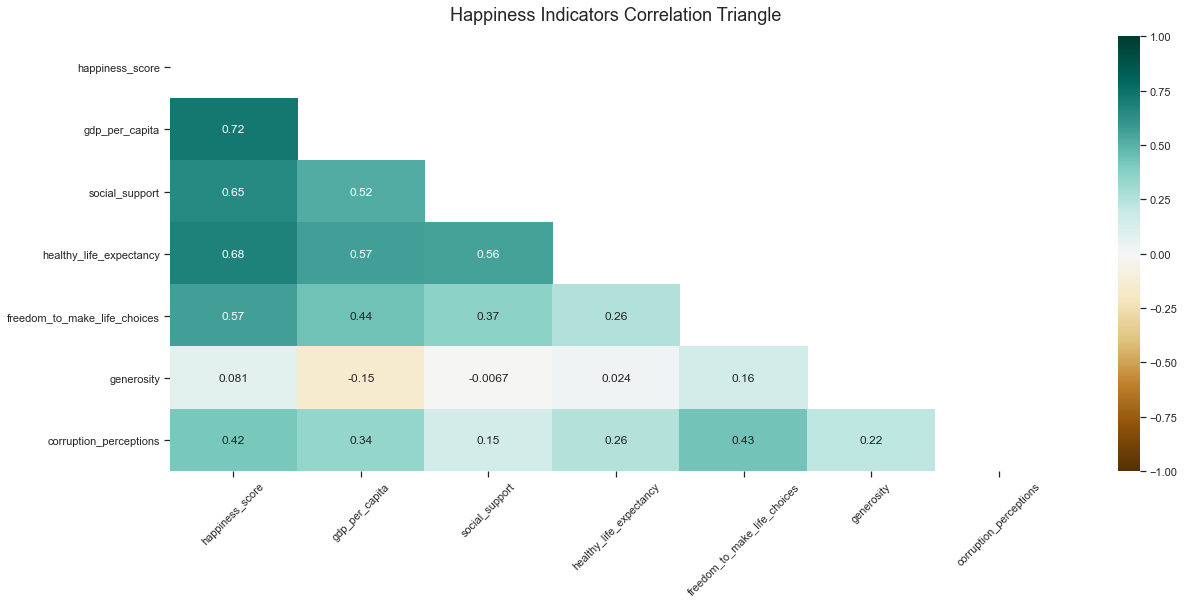

In [123]:
# Create triangle heatmap

plt.figure(figsize=(20,8), facecolor='none')

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(sub.corr(), dtype=np.bool))
tri_hm = sns.heatmap(sub.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
tri_hm.set_xticklabels(tri_hm.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

tri_hm.set_title('Happiness Indicators Correlation Triangle', fontdict={'fontsize':18}, pad=16);

In [125]:
# Export heatmap outside of Jupyter in the form of an image file

fig3 = tri_hm.get_figure()


fig3.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'tri_hm.png'))

**Coefficients meaning**  
0 - no relationship,  
0.1 - 0.3 - weak relationship,  
0.3 - 0.5 - moderate relationship,  
0.5 - 1 strong relationship


As presented in several heat maps above there is a strong correlation between Happiness Score and GDP_per_Capita, Family and Health. A strong correlation suggests that these variables tend to move together. However, this doesn't mean that one directly causes the other.

There is a significant correlation between Economy and Health (0.84). This finding could have practical implications, it might suggest that improving the economic situation in a country can have positive effects on the health of its citizens.

In the context of this analysis, 'Generosity' might not be a strong predictor of happiness as the value is below 0.3 which is the lowest number of all predictors. 'Genrosity' doesn't have strong relationships with any of presented variables. 

#### Scatterplot

In [93]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'country', 'region', 'happiness_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category',
       'annual_average', 'avg_annual_region', 'avg_annual'],
      dtype='object')

Text(0.5, 0.98, 'Correlations of Happiness Score')

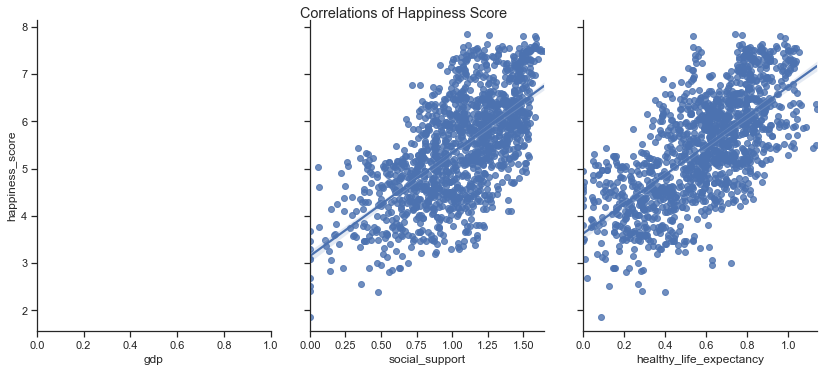

In [94]:
# Create a scatterplot for the "Happiness_Score" and the strongest indicators 

scat3 = sns.pairplot(sub, y_vars=['happiness_score'],
                  x_vars = ['gdp', 'social_support', 'healthy_life_expectancy'], kind = 'reg')
scat3.fig.set_size_inches(12, 6)
scat3.fig.suptitle('Correlations of Happiness Score')

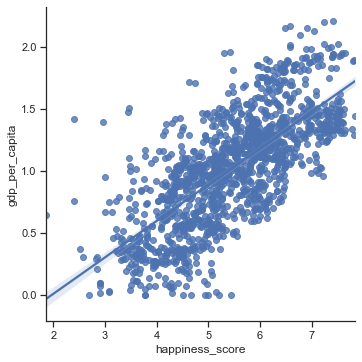

In [95]:
# Create a scatterplot for the "Happiness_Score" and "GDP_per_Capita" columns in seaborn

sns.lmplot(x = 'happiness_score', y = 'gdp_per_capita', data = sub)

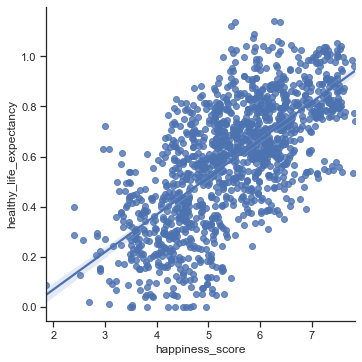

In [96]:
# Create a scatterplot for the "Happiness_Score" and "Health" columns in seaborn

sns.lmplot(x = 'happiness_score', y = 'healthy_life_expectancy', data = sub)

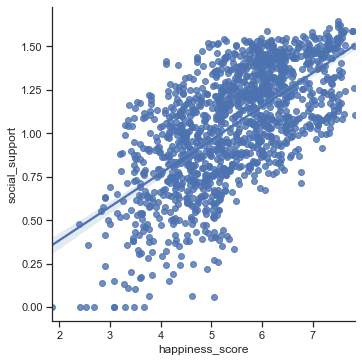

In [97]:
# Create a scatterplot for the "Happiness_Score" and 'Family' columns in seaborn

sns.lmplot(x = 'happiness_score', y = 'social_support', data = sub)

There is a strong positive linear correlation between 'Happiness_Score' and 'GDP_per_Capita', 'Health', and 'Family.' This means that as the values of these indicators increase, the Happiness_Score tends to increase as well. There is a pattern where countries with higher GDP per capita, better health outcomes, and stronger family support tend to report higher happiness scores.

#### Pair Plot

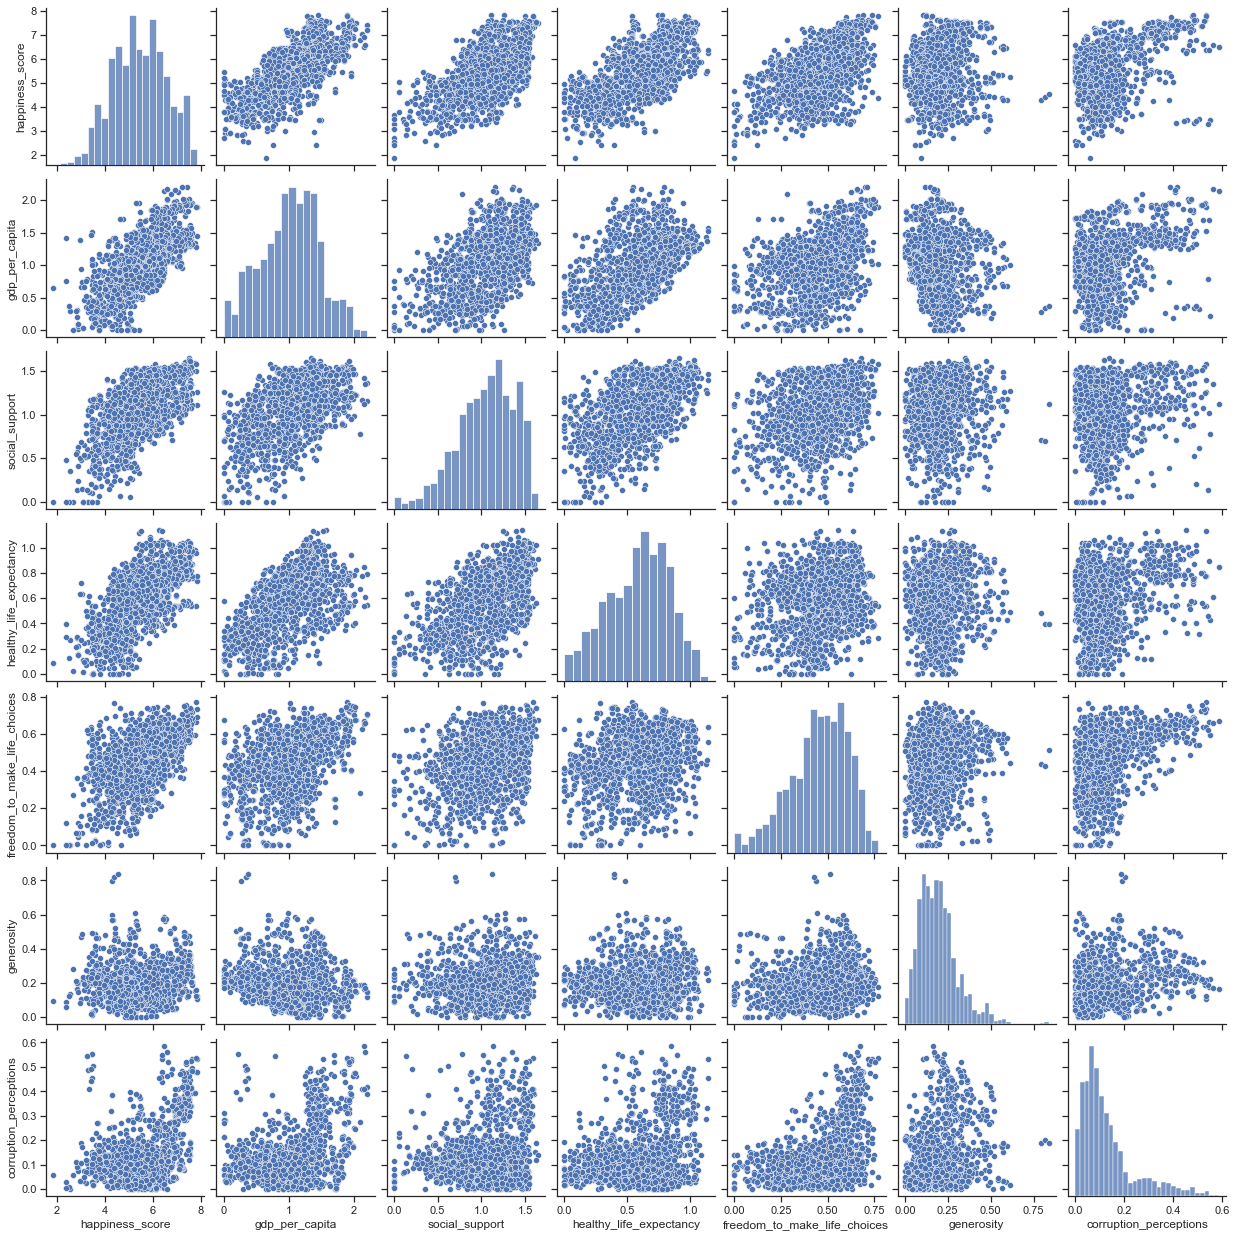

In [98]:
# Create a pair plot 

pair = sns.pairplot(sub)

In [99]:
# Export pair plot outside of Jupyter in the form of an image file

pair.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pair_plot.png'))

**The distribution of variables can provide us with an overall view of the data.**

*By looking at the position of the histogram peaks we can notice that:*  
'Generosity' has a symmetric distribution with a peak around the mean value (but few extreme values).  
'Corruption' appears to be positively skewed, with a peak to the left of the mean.  
'Happiness_Score' shows a bimodal distribution with two distinct peaks.  

*By considering the width of the histograms we can see spread or variability of variable's distribution:*  
'Health' has a narrow histogram, indicating lower variability in its values.  
'Corruption' has a wideer histogram, suggesting higher variability and a wideer range of values.

*By analyzing the shape of the histograms we can identify unusual patterns:*  
'Corruption' exhibits a strong positive skew, indicating a tail towards higher values.  
'Family' exhibits a strong negative skew, indicating a tail towards lower values.

*We can notice some outliers ore extreame values:*  
'Family' has a few outliers on the left side of the distribution, which might need further investigation.  
'Genrosity' has a few outliers on the right side of the distribution, which might need further investigation.

**Variable I would like to explore later**

I'm intrigued by the low importance on 'Generosity' for Happines Score. It may have a weak correlation with overall happiness on a global scale, but it doesn't mean that it's not important or that it doesn't vary significantly between countries or regions. As distribution shows there is few higer values on the right side of histogram. I would like to explore it later on. 

I'm also interest in investigating the outliers on the left side of the histogram for the 'Family' variable, especially given its strong correlation with happiness. Identifying the countries with exceptionally low family scores can provide valuable insights into situation in these countries and their well-being. 

#### Categorical Plot

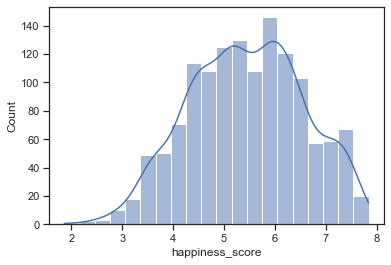

In [100]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

hist_plt = sns.histplot(sub['happiness_score'], bins = 20, kde = True)


In [101]:
# Export hist plot outside of Jupyter in the form of an image file

fig4 = hist_plt.get_figure()

fig4.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_plt.png'))

In [102]:
# Check the max value for Happines_Score

sub['happiness_score'].max()

7.842

In [103]:
# Check the max value for Happines_Score

sub['happiness_score'].min()

1.859

In [104]:
# Create a new variable 'Happines category'

sub.loc[sub['happiness_score'] < 5, 'happiness_category'] = 'Not happy'
sub.loc[(sub['happiness_score'] >= 5) & (sub['happiness_score'] < 6), 'happiness_category'] = 'Moderately happy'
sub.loc[sub['happiness_score'] >= 6, 'happiness_category'] = 'Happy'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [105]:
# Check the frequency of new variable 

sub['happiness_category'].value_counts(dropna = False)

Not happy           481
Happy               449
Moderately happy    432
Name: happiness_category, dtype: int64

KeyboardInterrupt: 

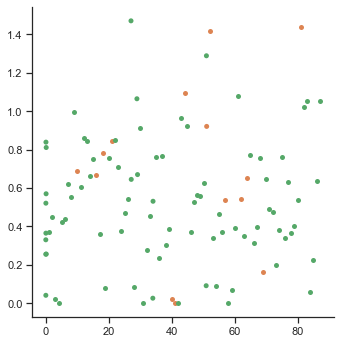

In [106]:
# Create a categorical plot in seaborn using the Happiness categories created above

sns.set(style= 'ticks')

cat_plt = sns.catplot(x= 'healthy_life_expectancy', y= 'gdp_per_capita', hue= 'happiness_category', data = sub)

The countries with higher coefficients for both GDP_per_capita and Health tend to exhibit higher levels of happiness. While this relationship is not absolute, it is evident that low values for both coefficients are characteristic of the countries categorized as less happy

In [ ]:
# Export categorical plot outside of Jupyter in the form of an image file

cat_plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_plt.png'))

In [ ]:
# Export the sub df as a csv file

sub.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'subset.csv'))

**Questions I can answer, thanks to this exploratory analysis**

*How do the indicators affect the happines level?*

The indicators such as GDP_per_Capita, Family, Health, Freedom, Corruption, and Generosity have varying degrees of impact on happiness. GDP per Capita, Family, and Health have strong positive correlations with happiness, suggesting that higher levels of these factors tend to lead to greater happiness. Freedom also positively affects happiness, but to a somewhat lesser extent. On the other hand, Corruption has a negative correlation with happiness, indicating that lower levels of corruption are associated with higher happiness. Generosity has a weak positive relationship with happiness, implying that it has a relatively minor impact on happiness levels.  

*How are the indicators correlated?*

Among the indicators, there are strong positive correlations between GDP per Capita and Health, as well as between Family and Health. Additionally, there's a moderate negative correlation between Freedom and Corruption, and moderate positive correlations between Freedom and Generosity, as well as between Corruption and Generosity.


**New questions that have arisen based on the early findings in visual exploration**

Are the observed correlations indicative of causation, or are there other underlying factors influencing both the happiness score and the predictors?

Are there countries or regions that deviate significantly from the observed correlations, and how can we explain these outliers?

**Hypotheses**

*Null Hypothesis*: There is no relationship between GDP per Capita and Happiness Score.  
*Alternative Hypothesis*: Higher GDP per Capita causes an increase in Happiness Score.

*Null Hypothesis*: There is no relationship between Family and Health.  
*Alternative Hypothesis*: Strong family support leads to better health outcomes.

*Null Hypothesis*: Regional differences do not significantly affect the correlations between predictors and Happiness Score.  
*Alternative Hypothesis*: Cultural factors influence how predictors relate to happiness.

In [ ]:
# count average happiness_score for each country and create a new column 

df['avg_happiness_score'] = df.groupby('country')['happiness_score'].transform('mean')

In [ ]:
# Create a variable 'happines_category' for whole data 

df.loc[df['avg_happiness_score'] < 5, 'happiness_category'] = 'Not happy'
df.loc[(df['avg_happiness_score'] >= 5) & (df['avg_happiness_score'] < 6), 'happiness_category'] = 'Moderately happy'
df.loc[df['avg_happiness_score'] >= 6, 'happiness_category'] = 'Happy'

In [ ]:
df.head()

In [ ]:
# Export the df as a csv file

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'))